# 1. Import Dependencies

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Check the coordinates

In [2]:
df_bench = pd.read_csv('./labeling/benchpress_coords_merged.csv')
df_dead = pd.read_csv('./labeling/deadlift_coords_merged.csv')
df_squat = pd.read_csv('./labeling/squat_coords_merged.csv')

In [3]:
df_bench.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
1,b_correct,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,-0.707418,0.985596,0.972952,0.608905,-0.118859,0.956751,0.724160,0.736117,-0.862484,0.994825
2,b_correct,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,-0.764271,0.978585,0.978824,0.608172,-0.101540,0.941800,0.723257,0.737576,-0.921502,0.993139
3,b_correct,0.342315,0.286979,0.466467,0.999992,0.325819,0.285868,0.529371,0.999994,0.325422,...,-0.635539,0.980626,0.981234,0.604804,-0.016468,0.940290,0.719281,0.736312,-0.785139,0.994317
4,b_correct,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,-0.825383,0.985708,0.987015,0.609234,-0.114778,0.966898,0.723577,0.738962,-0.948455,0.994775


In [4]:
df_dead.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,d_correct,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.491055,0.909689,0.588401,0.644509,0.169380,0.901291,0.728158,0.618136,0.480577,0.840292
1,d_correct,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.409666,0.857568,0.582093,0.645119,0.139664,0.876760,0.694696,0.614433,0.398222,0.798012
2,d_correct,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.369821,0.913276,0.565828,0.635022,0.151700,0.870137,0.743687,0.628615,0.331195,0.832618
3,d_correct,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.370875,0.964271,0.582262,0.644630,0.042322,0.923103,0.750335,0.640705,0.323895,0.838903
4,d_correct,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.414867,0.955359,0.579698,0.642973,0.006126,0.938232,0.745315,0.636252,0.365578,0.844092


In [5]:
df_squat.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,s_spine_neutral,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,-0.313403,0.976089,0.302474,0.597096,0.656582,0.806852,0.332788,0.694722,-0.373114,0.985341
1,s_spine_neutral,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,-0.305247,0.975016,0.359256,0.611075,0.285869,0.773935,0.334483,0.695383,-0.373157,0.984979
2,s_spine_neutral,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,-0.462458,0.976983,0.493459,0.641891,0.653005,0.840647,0.369003,0.695396,-0.618573,0.986593
3,s_spine_neutral,0.563577,0.157547,-0.483738,0.999883,0.564866,0.136710,-0.457015,0.999882,0.564586,...,-0.401422,0.968094,0.488726,0.641720,0.591863,0.822999,0.332679,0.700715,-0.569745,0.981765
4,s_spine_neutral,0.579107,0.414149,-0.166554,0.999601,0.593653,0.400882,-0.152463,0.999702,0.593684,...,-0.601359,0.977251,0.393079,0.617481,0.678957,0.802303,0.347247,0.690384,-0.761584,0.985078


# 3. Data Preprocessing & Data Normalization

In [6]:
# 데이터 로드
bench_data = np.loadtxt("./labeling/benchpress_coords_merged.csv", delimiter=",", dtype=str, skiprows=1)
labels = bench_data[:, 0]
bench_data = bench_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# 결측값 처리
bench_data = np.nan_to_num(bench_data)

bench_data = bench_data.astype(float)

# 데이터 분할
bench_X_train, bench_X_test, bench_y_train, bench_y_test = train_test_split(bench_data, labels, test_size=0.25)

# 텐서 변환
bench_X_train = torch.tensor(bench_X_train)
bench_X_test = torch.tensor(bench_X_test)
bench_y_train = torch.tensor(bench_y_train)
bench_y_test = torch.tensor(bench_y_test)

# float 변환
bench_X_train = bench_X_train.float()
bench_X_test = bench_X_test.float()
bench_y_train = bench_y_train.float()
bench_y_test = bench_y_test.float()

In [7]:
# 데이터 로드
squat_data = np.loadtxt("./labeling/squat_coords_merged.csv", delimiter=",", dtype=str, skiprows=1)
labels_squat = squat_data[:, 0]
squat_data = squat_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels_squat = encoder.fit_transform(labels_squat.reshape(-1, 1))

# 결측값 처리
squat_data = np.nan_to_num(squat_data)

squat_data = squat_data.astype(float)

# 데이터 분할
squat_X_train, squat_X_test, squat_y_train, squat_y_test = train_test_split(squat_data, labels_squat, test_size=0.25)

# 텐서 변환
squat_X_train = torch.tensor(squat_X_train)
squat_X_test = torch.tensor(squat_X_test)
squat_y_train = torch.tensor(squat_y_train)
squat_y_test = torch.tensor(squat_y_test)

# float 변환
squat_X_train = squat_X_train.float()
squat_X_test = squat_X_test.float()
squat_y_train = squat_y_train.float()
squat_y_test = squat_y_test.float()

In [8]:
# 데이터 로드
deadlift_data = np.loadtxt("./labeling/deadlift_coords_merged.csv", delimiter=",", dtype=str, skiprows=1)
labels_deadlift = deadlift_data[:, 0]
deadlift_data = deadlift_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels_deadlift = encoder.fit_transform(labels_deadlift.reshape(-1, 1))

# 결측값 처리
deadlift_data = np.nan_to_num(deadlift_data)

deadlift_data = deadlift_data.astype(float)

# 데이터 분할
deadlift_X_train, deadlift_X_test, deadlift_y_train, deadlift_y_test = train_test_split(deadlift_data, labels_deadlift, test_size=0.25)

# 텐서 변환
deadlift_X_train = torch.tensor(deadlift_X_train)
deadlift_X_test = torch.tensor(deadlift_X_test)
deadlift_y_train = torch.tensor(deadlift_y_train)
deadlift_y_test = torch.tensor(deadlift_y_test)

# float 변환
deadlift_X_train = deadlift_X_train.float()
deadlift_X_test = deadlift_X_test.float()
deadlift_y_train = deadlift_y_train.float()
deadlift_y_test = deadlift_y_test.float()

# 4. Construct Deep Learning Model

### Bench Press

In [9]:
class DeepClassifier(nn.Module):
    def __init__(self, input_size, output_size, num_heads=4, num_layers=2):
        super(DeepClassifier, self).__init__()
        self.embedding = nn.Linear(input_size, 128)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=128, nhead=num_heads),
            num_layers=num_layers
        )
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, output_size)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embedding(x)  # Linear projection to embedding space
        x = self.transformer(x.unsqueeze(1))  # Apply transformer
        x = x.mean(dim=1)  # Global average pooling
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [10]:
# 모델 생성
input_size = 132
output_size = 3
bench_model = DeepClassifier(input_size, output_size)

In [29]:
bench_criterion = nn.CrossEntropyLoss()
bench_optimizer = optim.Adam(bench_model.parameters(), lr=0.001)

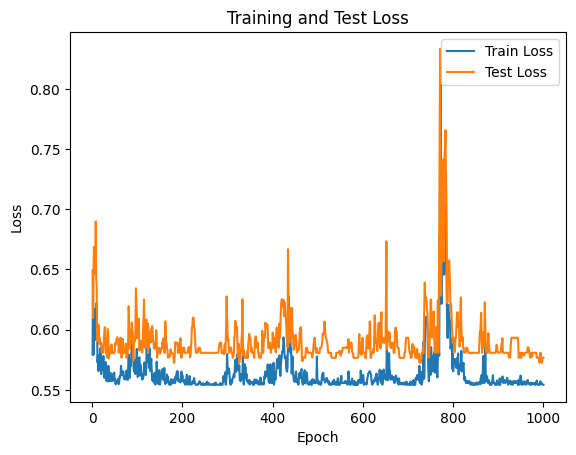

In [30]:
bench_train_losses = []
bench_test_losses = []

epochs = 1000

for epoch in range(epochs):
    bench_model.train()
    bench_optimizer.zero_grad()
    bench_outputs = bench_model(bench_X_train)
    loss = bench_criterion(bench_outputs, bench_y_train)
    loss.backward()
    bench_optimizer.step()
    bench_train_losses.append(loss.item())
    
    bench_model.eval()
    with torch.no_grad():
        bench_test_outputs = bench_model(bench_X_test)
        bench_test_loss = bench_criterion(bench_test_outputs, bench_y_test)
        bench_test_losses.append(bench_test_loss.item())

plt.plot(range(1, epochs+1), bench_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), bench_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [31]:
bench_model.eval()
with torch.no_grad():
    test_outputs = bench_model(bench_X_test)
    test_loss = bench_criterion(test_outputs, bench_y_test)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.5767635107040405


In [32]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = bench_X_test[sample_index]  # 입력 데이터
    target_sample = bench_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    bench_model.eval()
    with torch.no_grad():
        prediction = bench_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 0.5000,  0.3731,  0.7219,  1.0000,  0.5093,  0.3744,  0.7689,  1.0000,
         0.5173,  0.3762,  0.7694,  1.0000,  0.5258,  0.3783,  0.7690,  1.0000,
         0.4902,  0.3734,  0.7969,  1.0000,  0.4848,  0.3742,  0.7969,  1.0000,
         0.4795,  0.3753,  0.7971,  1.0000,  0.5388,  0.3907,  0.8102,  1.0000,
         0.4718,  0.3868,  0.9461,  1.0000,  0.5160,  0.3813,  0.7162,  1.0000,
         0.4909,  0.3803,  0.7529,  1.0000,  0.6180,  0.4258,  0.6765,  0.9999,
         0.4000,  0.4250,  0.8186,  1.0000,  0.7270,  0.3807,  0.7178,  0.9798,
         0.2925,  0.3625,  0.8849,  0.9966,  0.7760,  0.3008,  0.8753,  0.9539,
         0.2606,  0.2849,  1.0256,  0.9918,  0.7822,  0.2803,  0.8822,  0.9144,
         0.2545,  0.2671,  1.0113,  0.9841,  0.7672,  0.2789,  0.8783,  0.8985,
         0.2698,  0.2674,  1.0442,  0.9766,  0.7609,  0.2859,  0.8674,  0.9022,
         0.2750,  0.2729,  1.0261,  0.9752,  0.6064,  0.5295, -0.0181,  1.0000,
         0.4221,  0.5300, 

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_44565/658835650.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [33]:
bench_model.eval()
with torch.no_grad():
    predicted_probs = bench_model(bench_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(bench_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(bench_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(bench_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(bench_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.975
정밀도: 0.975
재현율: 0.975
F1 점수: 0.975


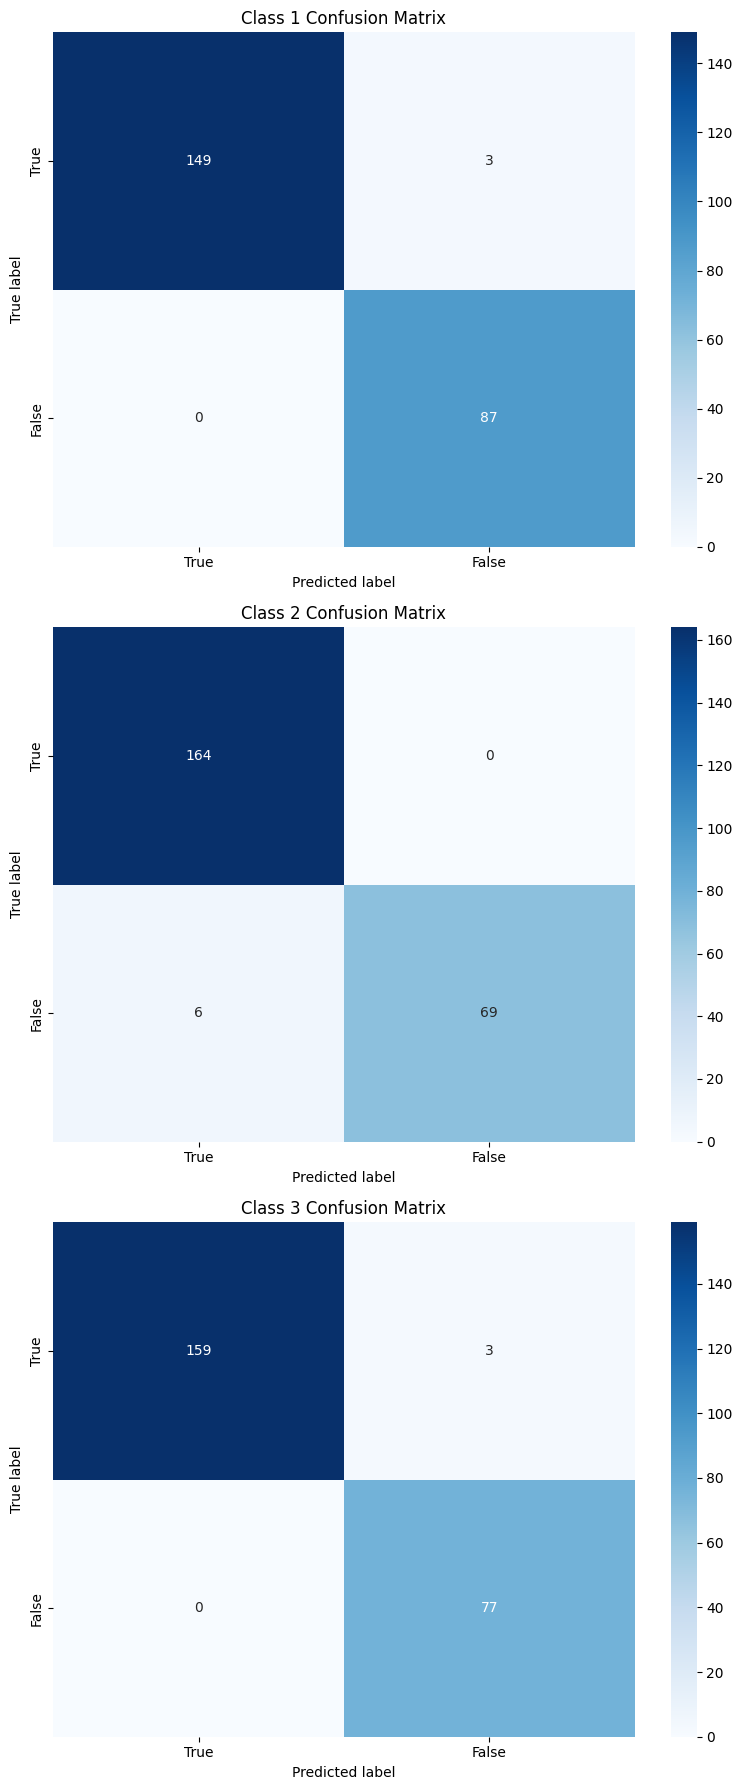

In [34]:
confusion_matrix = multilabel_confusion_matrix(bench_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)

### Squat

In [17]:
# 모델 생성
input_size = 132
output_size = 4
squat_model = DeepClassifier(input_size, output_size)
squat_criterion = nn.CrossEntropyLoss()
squat_optimizer = optim.Adam(squat_model.parameters(), lr=0.001)

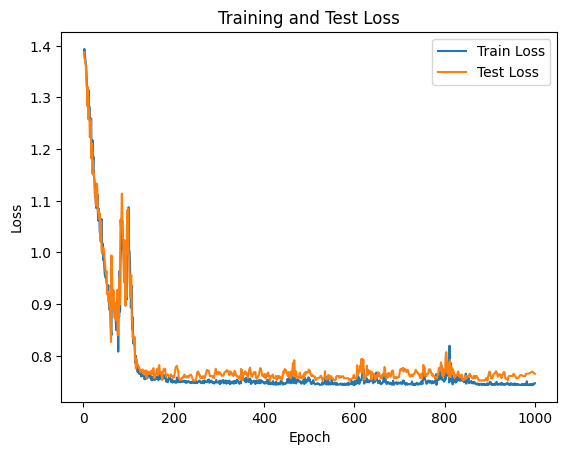

In [18]:
squat_train_losses = []
squat_test_losses = []

epochs = 1000

for epoch in range(epochs):
    squat_model.train()
    squat_optimizer.zero_grad()
    squat_outputs = squat_model(squat_X_train)
    squat_loss = squat_criterion(squat_outputs, squat_y_train)
    squat_loss.backward()
    squat_optimizer.step()
    squat_train_losses.append(squat_loss.item())
    
    squat_model.eval()
    with torch.no_grad():
        squat_test_outputs = squat_model(squat_X_test)
        squat_test_loss = squat_criterion(squat_test_outputs, squat_y_test)
        squat_test_losses.append(squat_test_loss.item())

plt.plot(range(1, epochs+1), squat_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), squat_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [19]:
squat_model.eval()
with torch.no_grad():
    squat_test_outputs = squat_model(squat_X_test)
    squat_test_loss = squat_criterion(squat_test_outputs, squat_y_test)
    print(f'Test Loss: {squat_test_loss.item()}')

Test Loss: 0.7652286887168884


In [20]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = squat_X_test[sample_index]  # 입력 데이터
    target_sample = squat_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    squat_model.eval()
    with torch.no_grad():
        prediction = squat_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 0.5503,  0.4667, -0.8393,  0.9999,  0.5592,  0.4619, -0.8640,  0.9999,
         0.5656,  0.4611, -0.8638,  0.9998,  0.5721,  0.4601, -0.8639,  0.9998,
         0.5436,  0.4601, -0.8549,  0.9999,  0.5385,  0.4582, -0.8551,  0.9999,
         0.5338,  0.4562, -0.8553,  0.9999,  0.5825,  0.4502, -0.7968,  0.9998,
         0.5255,  0.4477, -0.7548,  1.0000,  0.5608,  0.4636, -0.7949,  0.9999,
         0.5419,  0.4624, -0.7842,  1.0000,  0.6504,  0.4420, -0.5903,  0.9999,
         0.4737,  0.4392, -0.5781,  1.0000,  0.7228,  0.4850, -0.8311,  0.9625,
         0.3890,  0.4918, -0.8223,  0.9967,  0.6902,  0.4773, -1.0830,  0.8649,
         0.4086,  0.4803, -1.1389,  0.9939,  0.6824,  0.4747, -1.1413,  0.7802,
         0.4023,  0.4748, -1.2088,  0.9795,  0.6675,  0.4668, -1.1248,  0.7739,
         0.4184,  0.4674, -1.1842,  0.9781,  0.6654,  0.4679, -1.0817,  0.7153,
         0.4229,  0.4699, -1.1349,  0.9662,  0.6122,  0.5029,  0.0075,  0.9999,
         0.5132,  0.5004, 

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_44565/3174289499.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [21]:
squat_model.eval()
with torch.no_grad():
    predicted_probs = squat_model(squat_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(squat_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(squat_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(squat_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(squat_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.978
정밀도: 0.978
재현율: 0.978
F1 점수: 0.978


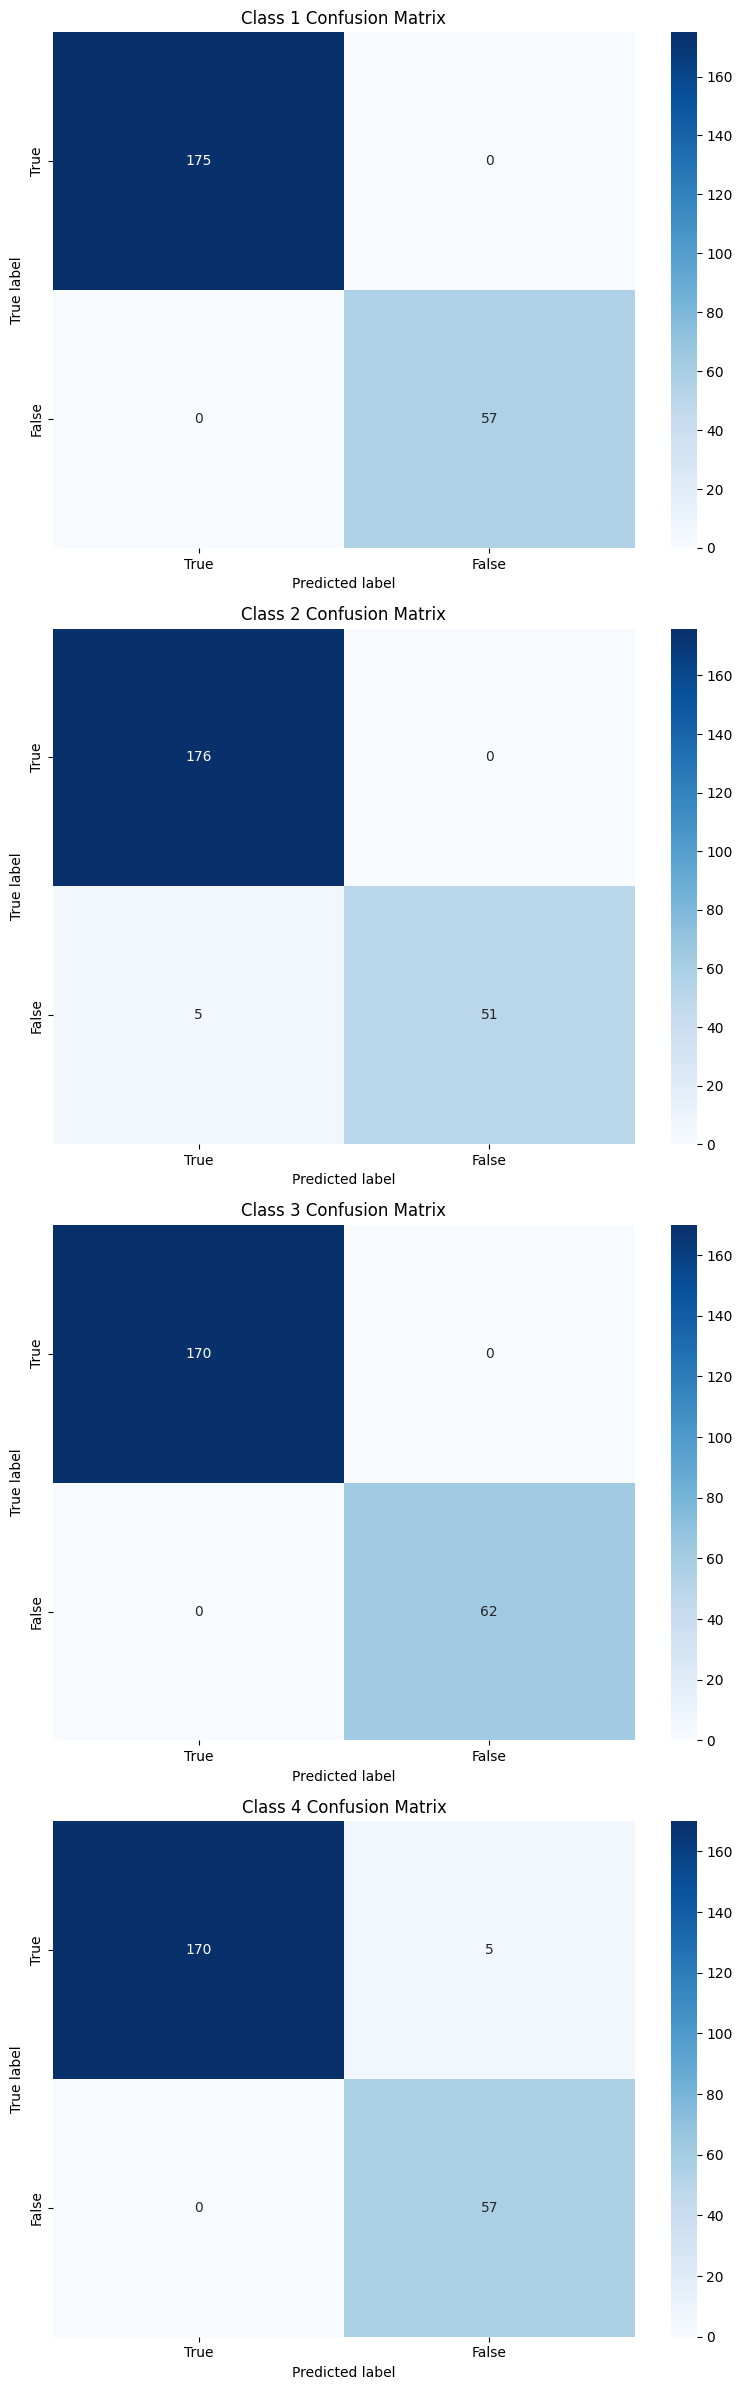

In [22]:
confusion_matrix = multilabel_confusion_matrix(squat_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)

### Deadlift

In [23]:
# 모델 생성
input_size = 132
output_size = 4
deadlift_model = DeepClassifier(input_size, output_size)
deadlift_criterion = nn.CrossEntropyLoss()
deadlift_optimizer = optim.Adam(deadlift_model.parameters(), lr=0.001)

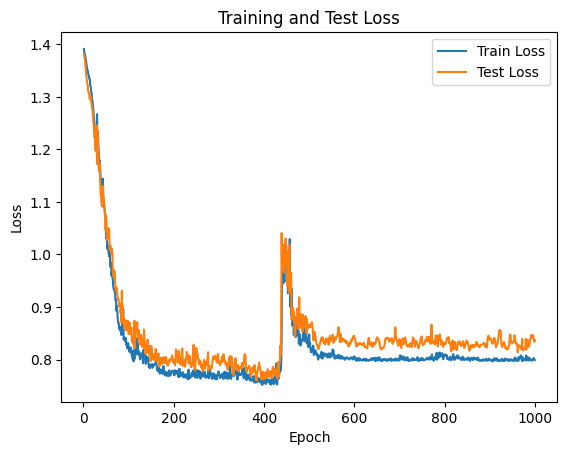

In [24]:
deadlift_train_losses = []
deadlift_test_losses = []

epochs = 1000

for epoch in range(epochs):
    deadlift_model.train()
    deadlift_optimizer.zero_grad()
    deadlift_outputs = deadlift_model(deadlift_X_train)
    deadlift_loss = deadlift_criterion(deadlift_outputs, deadlift_y_train)
    deadlift_loss.backward()
    deadlift_optimizer.step()
    deadlift_train_losses.append(deadlift_loss.item())
    
    deadlift_model.eval()
    with torch.no_grad():
        deadlift_test_outputs = deadlift_model(deadlift_X_test)
        deadlift_test_loss = deadlift_criterion(deadlift_test_outputs, deadlift_y_test)
        deadlift_test_losses.append(deadlift_test_loss.item())

plt.plot(range(1, epochs+1), deadlift_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), deadlift_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [25]:
deadlift_model.eval()
with torch.no_grad():
    deadlift_test_outputs = deadlift_model(deadlift_X_test)
    deadlift_test_loss = deadlift_criterion(deadlift_test_outputs, deadlift_y_test)
    print(f'Test Loss: {deadlift_test_loss.item()}')

Test Loss: 0.8370264172554016


In [26]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = deadlift_X_test[sample_index]  # 입력 데이터
    target_sample = deadlift_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    deadlift_model.eval()
    with torch.no_grad():
        prediction = deadlift_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 7.1129e-01,  1.4381e-01,  3.5984e-01,  9.9020e-01,  7.0749e-01,
         1.3424e-01,  2.8256e-01,  9.9180e-01,  7.0195e-01,  1.3432e-01,
         2.8249e-01,  9.9184e-01,  6.9654e-01,  1.3451e-01,  2.8249e-01,
         9.9241e-01,  7.2433e-01,  1.3462e-01,  3.1260e-01,  9.9262e-01,
         7.3099e-01,  1.3491e-01,  3.1268e-01,  9.9264e-01,  7.3783e-01,
         1.3539e-01,  3.1260e-01,  9.9282e-01,  6.9298e-01,  1.4084e-01,
         4.0646e-04,  9.9389e-01,  7.5052e-01,  1.4234e-01,  1.2908e-01,
         9.9418e-01,  7.0135e-01,  1.5447e-01,  2.6962e-01,  9.9374e-01,
         7.1985e-01,  1.5525e-01,  3.0637e-01,  9.9410e-01,  6.3637e-01,
         2.0407e-01, -1.9714e-01,  9.9994e-01,  8.2201e-01,  2.2188e-01,
         1.2288e-01,  9.9810e-01,  6.0089e-01,  2.9992e-01, -2.2060e-01,
         9.8967e-01,  8.2516e-01,  3.0892e-01,  1.4286e-01,  2.1178e-01,
         5.6752e-01,  3.8202e-01, -7.4406e-02,  9.5626e-01,  8.0400e-01,
         3.7775e-01,  2.0646e-01,  1.

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_44565/2186968047.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [27]:
deadlift_model.eval()
with torch.no_grad():
    predicted_probs = deadlift_model(deadlift_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(deadlift_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(deadlift_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(deadlift_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(deadlift_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.905
정밀도: 0.912
재현율: 0.905
F1 점수: 0.908


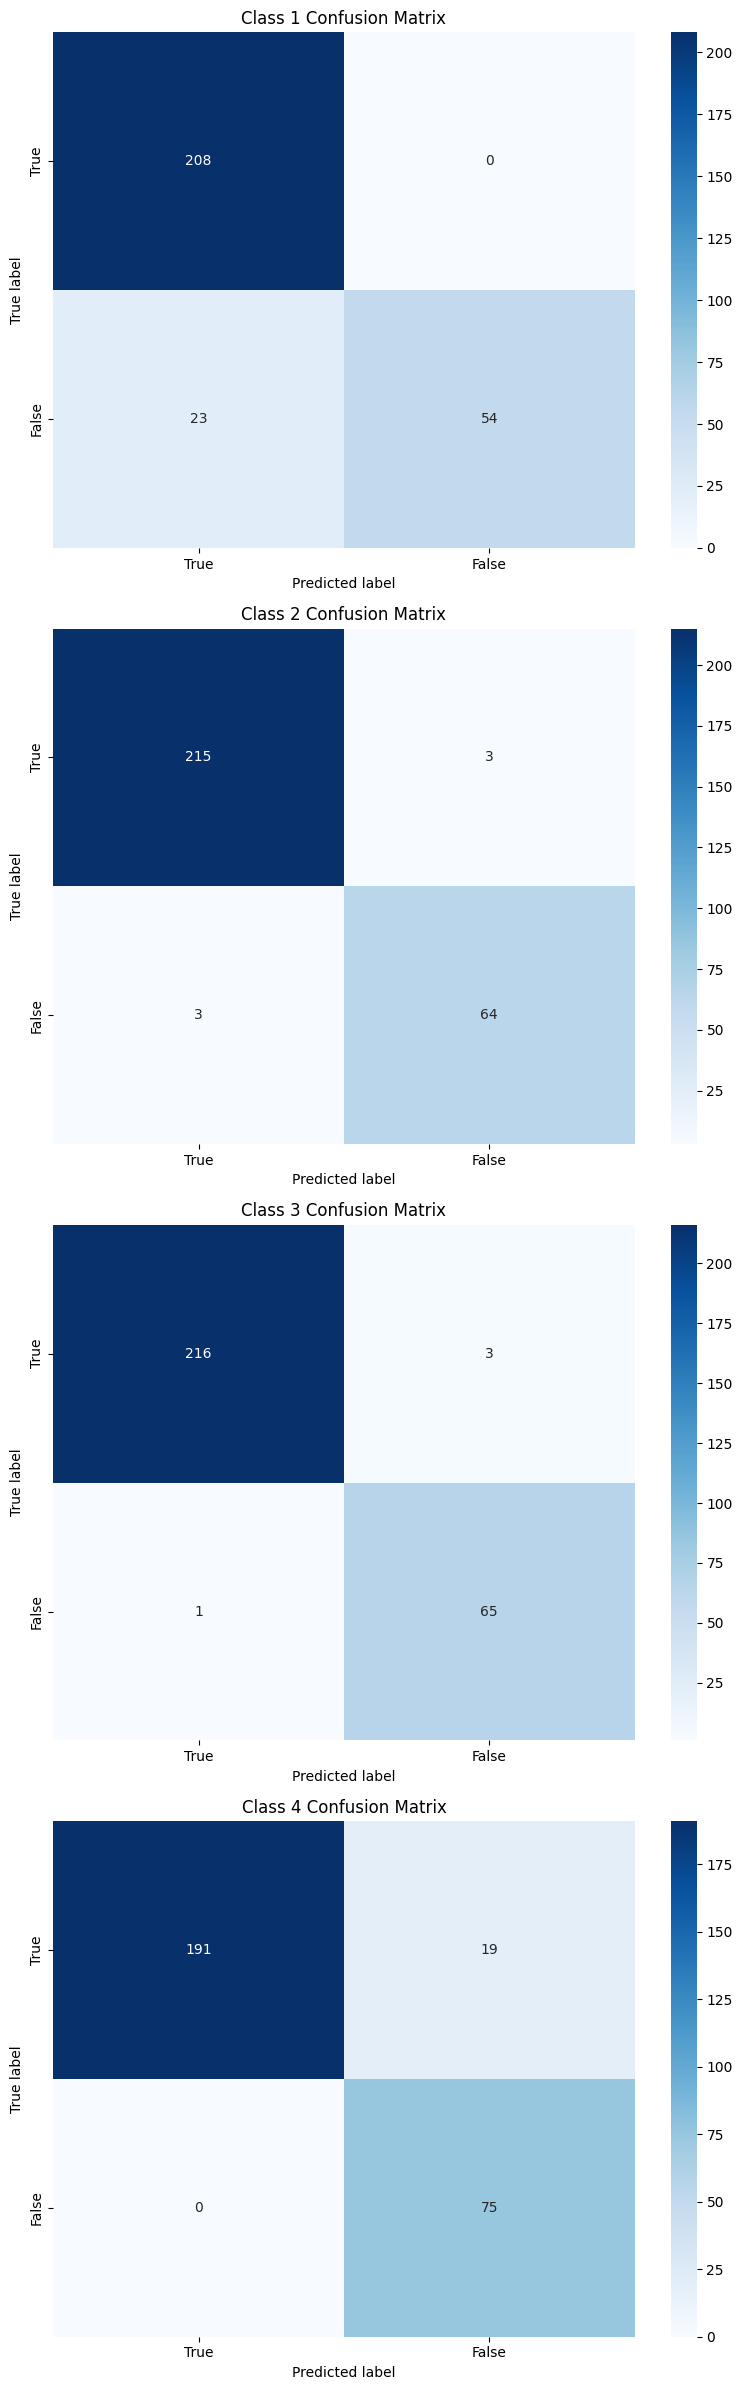

In [28]:
confusion_matrix = multilabel_confusion_matrix(deadlift_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)

# Save models

In [55]:
import pickle

# Bench Press
with open('benchpress_model_deep_merged.pkl', 'wb') as f:
    pickle.dump(bench_model, f)

# Squat
with open('squat_model_deep_merged.pkl', 'wb') as f:
    pickle.dump(squat_model, f)

# Deadlift
with open('deadlift_model_deep_merged.pkl', 'wb') as f:
    pickle.dump(deadlift_model, f)

In [56]:
bench_X_test.shape

torch.Size([239, 132])

In [57]:
squat_X_test.shape

torch.Size([232, 132])

In [58]:
deadlift_X_test.shape

torch.Size([285, 132])